This is just a notebook that record my learning progress.

## k-Nearest Neighbors

- Pros: high accuracy, insensitive to outliers, no assumptions about data
- Cons: computationally expensive, requires a lot of memory
- Works with: numerical values, nominal values


**General Approach to kNN:**
  1. Collect Data
  2. Prepare: Numeric values are needed for a distance calculation. A structured data format is best.
  3. Analyze the Data
  4. Train: Does not apply to the kNN algorithm
  5. Test: Calculate the error rate
  6. Use: This application needs to get some input data and output structured numeric values. Next, the application runs the kNN algorithm on this input data and determines which class the input data should belong to. The application then takes some action on the calculated class.



In [8]:
import numpy as np
import operator
from os import listdir

In [60]:
def classify0(input_vec, dataset, labels, k): 
    ##input_vec ~ 'input vector', dataset ~ 'full matrix of examples', labels ~ 'a vector of labels', k ~ 'the number of nearest neighbors in the voting'
    
    ##Part1 distance calculation and sort
    dataset_size = dataset.shape[0]
    diff_mat     = tile(input_vec, (dataset_size,1)) - dataset
    sq_diff_mat  = diff_mat ** 2
    sq_distance  = sq_diff_mat.sum(axis = 1)
    distance     = sq_distance ** 0.5
    sort_dis_ind = distance.argsort()
    
    ## voting with lowest k distances
    class_count = {}
    for i in range(k):
        vote_label = labels[sort_dis_ind[i]]
        class_count[vote_label] = class_count.get(vote_label, 0) + 1
    
    ## sort the voting results
    sort_class_count = sorted(class_count.items(), key = operator.itemgetter(1), reverse=True)
    
    return sort_class_count

Now we will test with a simple instance:

In [10]:
def createDataset():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B'] 
    return group, labels

In [11]:
group, labels = createDataSet()

[('B', 2), ('A', 1)]


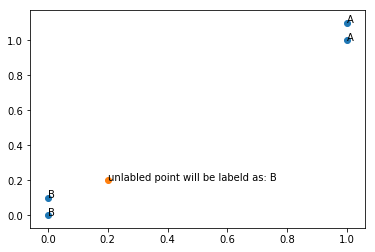

In [76]:
import matplotlib.pyplot as plt


test_point = [0.2,0.2]
print (classify0(test_point, group, labels, 3))

fig, ax = plt.subplots()
ax.scatter(group[:,0], group[:,1])
ax.scatter(test_point[0], test_point[1])

for i, label in enumerate(labels):
    ax.annotate(label, (group[i,0], group[i,1]))
ax.annotate('unlabled point will be labeld as: %s' \
            %str(classify0(test_point, group, labels, 3)[0][0]), test_point)
plt.show()